In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Get Data

In [7]:
df = pd.read_csv("building_units_inspection.csv")

In [8]:
df.head()

,unit,status,no_rooms,no_bath,area(ftsq),id,date,price,units,stories,...,Single-Family Home,Doorman,Full-time Doorman,Cats Only - No Dogs,Part-time Doorman,Elevator,Cats and Dogs Allowed,Pets Allowed,ZIPCODE,SCORE
3,#4,"Off-Market,rent",2.0,1.0,650,784204,09/28/2015,3200.0,28.0,8.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,10002.0,22.023928
4,#4D,"Off-Market,rent",1.0,1.0,646,784204,08/04/2017,3950.0,28.0,8.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,10002.0,22.023928
5,#D,"Off-Market,rent",2.0,1.0,800,784204,04/07/2015,2900.0,28.0,8.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,10002.0,22.023928
6,#7B,"Off-Market,rent",1.0,1.0,485,784204,03/19/2018,2975.0,28.0,8.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,10002.0,22.023928
7,#8C,"Off-Market,rent",1.0,1.0,500,784204,02/02/2015,2300.0,28.0,8.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,10002.0,22.023928


In [9]:
df.columns

Index(['unit', 'status', 'no_rooms', 'no_bath', 'area(ftsq)', 'id', 'date',
       'price', 'units', 'stories', 'zip', 'age', 'Co-op', 'Condo',
       'Rental Building', 'Single-Family Home', 'Doorman', 'Full-time Doorman',
       'Cats Only - No Dogs', 'Part-time Doorman', 'Elevator',
       'Cats and Dogs Allowed', 'Pets Allowed', 'ZIPCODE', 'SCORE'],
      dtype='object')

In [10]:
df['price'].describe()

count    8293.000000
mean     4165.297721
std      1615.094026
min      1400.000000
25%      3000.000000
50%      3650.000000
75%      4892.000000
max      9995.000000
Name: price, dtype: float64

In [11]:
df[df['price']==1].count()

unit                     0
status                   0
no_rooms                 0
no_bath                  0
area(ftsq)               0
id                       0
date                     0
price                    0
units                    0
stories                  0
zip                      0
age                      0
Co-op                    0
Condo                    0
Rental Building          0
Single-Family Home       0
Doorman                  0
Full-time Doorman        0
Cats Only - No Dogs      0
Part-time Doorman        0
Elevator                 0
Cats and Dogs Allowed    0
Pets Allowed             0
ZIPCODE                  0
SCORE                    0
dtype: int64

In [12]:
X = df[['no_rooms', 'no_bath', 'area(ftsq)', 'units',
       'stories', 'zip', 'age', 'Co-op', 'Condo', 'Rental Building',
       'Single-Family Home', 'Cats Only - No Dogs', 'Part-time Doorman',
       'Doorman', 'Elevator', 'Cats and Dogs Allowed', 'Pets Allowed',
       'Full-time Doorman', 'SCORE']].copy()

In [13]:
y = df['price'].copy()

## label distribution
    - Binomial dist because we have both rental and for-sale

In [14]:
def plot_dist(label):
    from scipy.stats import skew
    from scipy import stats
    from scipy.stats.stats import pearsonr
    from scipy.stats import norm
    #label = np.log1p(y)
    sns.distplot(label , fit=norm)
    (mu, sigma) = norm.fit(label)
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
                loc='best')
    plt.ylabel('Frequency')
    plt.title('SalePrice distribution')

    fig = plt.figure()
    res = stats.probplot(label, plot=plt)
    plt.show()

    print("Skewness: %f" % label.skew())
    print("Kurtosis: %f" % label.kurt())

In [15]:
def iqr_outlier(df, col):
    q1, q3 = df[col].quantile(0.25), df[col].quantile(0.75)
    iqr = q3 - q1
    lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
    return df[(df[col] >= lower) & (df[col] <= upper)]


 mu = 4165.30 and sigma = 1615.00



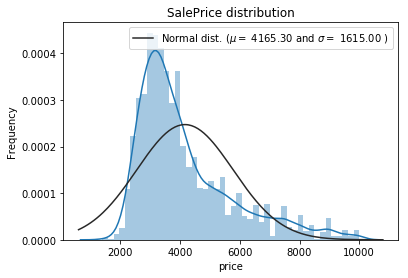

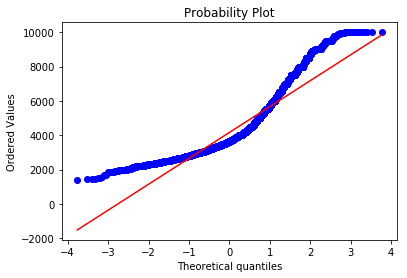

Skewness: 1.353904
Kurtosis: 1.427348


In [16]:
plot_dist(y)


 mu = 3939.63 and sigma = 1281.28



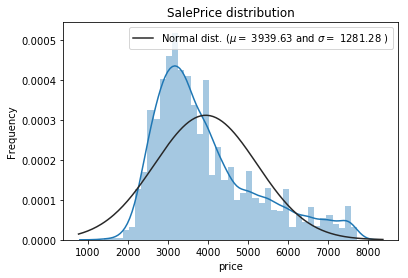

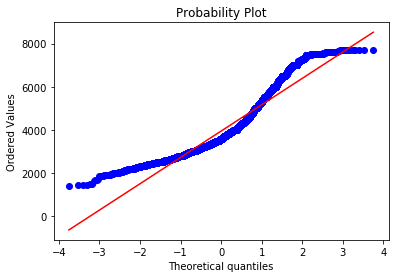

Skewness: 1.028921
Kurtosis: 0.409515


In [17]:
outlier1 = iqr_outlier(df,'price')
plot_dist(outlier1['price'])

## feature correlation

In [18]:
data = df[['price', 'no_rooms', 'no_bath', 'area(ftsq)', 'units',
       'stories', 'age', 'SCORE', 'Co-op', 'Condo', 'Rental Building',
       'Single-Family Home', 'Cats Only - No Dogs', 'Part-time Doorman',
       'Doorman', 'Elevator', 'Cats and Dogs Allowed', 'Pets Allowed',
       'Full-time Doorman']].copy()

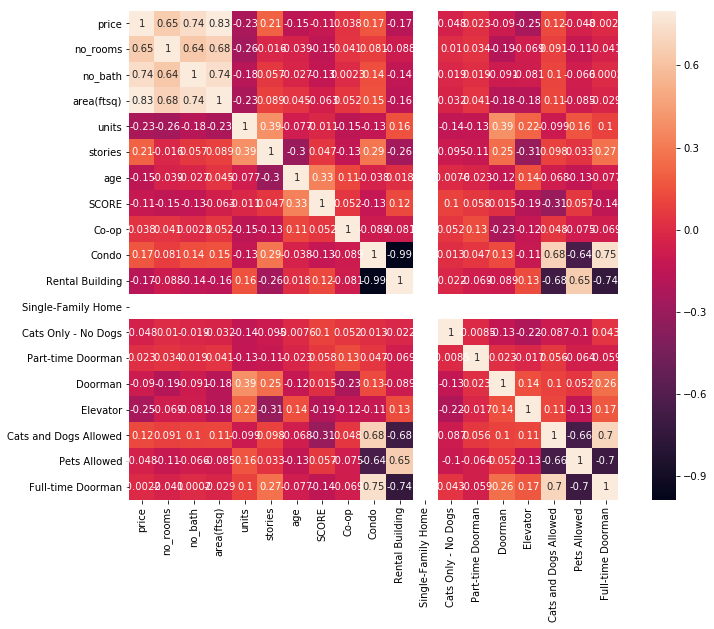

In [19]:
# Correlation Matrix Heatmap
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True);

In [20]:
# most correlated features
corrmat.nlargest(10, 'price')['price'].index[1:]

Index(['area(ftsq)', 'no_bath', 'no_rooms', 'stories', 'Condo',
       'Cats and Dogs Allowed', 'Co-op', 'Part-time Doorman',
       'Full-time Doorman'],
      dtype='object')

# Fit models

In [21]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LassoCV, LinearRegression
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
# from sklearn.ensemble import GradientBoostingRegressor
# from mlxtend.regressor import StackingCVRegressor

In [22]:
def pipline_models(X, y, model, coef=True, feature_importances=False):
    var_names = ['no_rooms', 'no_bath', 'area(ftsq)', 'units',
       'stories', 'age', 'SCORE', 'Co-op', 'Condo', 'Rental Building',
       'Single-Family Home', 'Cats Only - No Dogs', 'Part-time Doorman',
       'Doorman', 'Elevator', 'Cats and Dogs Allowed', 'Pets Allowed',
       'Full-time Doorman']
    np.random.seed(0)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    lm = model.fit(X_train, y_train)
    print("IS r2: ", lm.score(X_train, y_train))
    print("OS r2: ", lm.score(X_test, y_test))
    if coef:
        print([i+": "+str(j) for i,j in zip(var_names, lm.coef_)])
    if feature_importances:
        print([i+": "+str(j) for i,j in zip(var_names, lm.feature_importances_)])

## general model

In [23]:
general_data = iqr_outlier(data,'price')
# data['price'] = np.log1p(data['price'])
general_data = RobustScaler().fit_transform(general_data)
X = general_data[:, 1:]
y = general_data[:, 0]

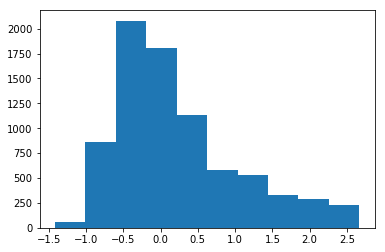

In [24]:
plt.hist(y)
plt.show()

In [25]:
# svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003,))  # to be tunned 
# gbr = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, 
#                                 max_features='sqrt', min_samples_leaf=15, min_samples_split=10, 
#                                 loss='huber', random_state =0) # to be tunned   
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)
lasso = LassoCV(max_iter=1e7, random_state=0, cv=kfolds)  # alphas to be tunned  

In [26]:
pipline_models(X, y, lasso)
print()
pipline_models(X, y, LinearRegression())
print()
pipline_models(X, y, SVR(kernel='linear', C= 20, epsilon= 0.008, gamma=0.0003)) # takes too long
print()
pipline_models(X, y, RandomForestRegressor(n_estimators=100), coef=False, feature_importances=True)
print()

IS r2:  0.742040143593
OS r2:  0.74171712467
['no_rooms: 0.253120490003', 'no_bath: 0.465315814691', 'area(ftsq): 0.544894609287', 'units: -0.137058260736', 'stories: 0.118336737974', 'age: -0.190521194098', 'SCORE: -0.0346006215475', 'Co-op: 0.0', 'Condo: -0.102076542612', 'Rental Building: 0.0', 'Single-Family Home: 0.0', 'Cats Only - No Dogs: -0.209425653237', 'Part-time Doorman: -0.0974421924719', 'Doorman: 0.172453560629', 'Elevator: -0.279830183377', 'Cats and Dogs Allowed: 0.0550420985045', 'Pets Allowed: -0.0793717076059', 'Full-time Doorman: -0.0649109389479']

IS r2:  0.74230942856
OS r2:  0.740674202211
['no_rooms: 0.254688570034', 'no_bath: 0.471095584359', 'area(ftsq): 0.541953238907', 'units: -0.140298892768', 'stories: 0.11873071859', 'age: -0.194567092892', 'SCORE: -0.0350550035465', 'Co-op: 0.0914282807927', 'Condo: -0.0994589707534', 'Rental Building: 0.00803068996073', 'Single-Family Home: -9.71445146547e-17', 'Cats Only - No Dogs: -0.260632871001', 'Part-time Doorma

# Random model bagging

In [27]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

l_pred = lasso.fit(X_train, y_train).predict(X_test)
lr_pred = LinearRegression().fit(X_train, y_train).predict(X_test)
avg_pred = (l_pred+lr_pred)/2
lr_rms = sqrt(mean_squared_error(y_test, avg_pred))

rf_pred = RandomForestRegressor(n_estimators=100).fit(X_train, y_train).predict(X_test)
rf_rms = sqrt(mean_squared_error(y_test, rf_pred))

lr_rms, rf_rms = lr_rms/(lr_rms+rf_rms), rf_rms/(lr_rms+rf_rms)

In [28]:
lr_r2 = r2_score(y_test, lr_rms*avg_pred+rf_rms*rf_pred)
lr_r2

0.84410331674693173